In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# Load data
iris = load_iris()

features=iris.feature_names
print(features)

X = iris.data[:, :2]  # we only take the first two features.

# Extracting Target / Class Labels
y = iris.target
print(y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[Text(0.36890243902439024, 0.9615384615384616, 'sepal length (cm) <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.0975609756097561, 0.8846153846153846, 'sepal width (cm) <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.04878048780487805, 0.8076923076923077, 'sepal length (cm) <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.024390243902439025, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07317073170731707, 0.7307692307692307, 'sepal length (cm) <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.04878048780487805, 0.6538461538461539, 'sepal width (cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.024390243902439025, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.07317073170731707, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.0975609756097561, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.

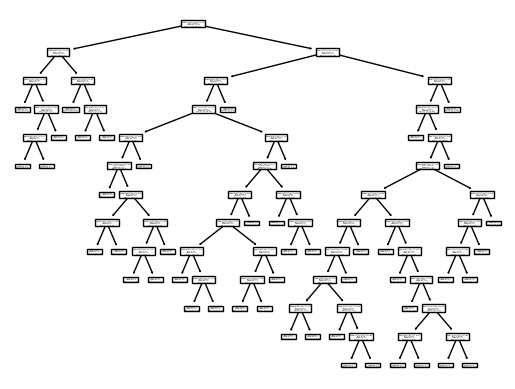

In [43]:
#train decision tree

clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X,y)
tree.plot_tree(clf, feature_names=features)

In [38]:
#evaluation

y_pred = clf.predict(X)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[50  0  0]
 [ 0 49  1]
 [ 0 10 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.83      0.98      0.90        50
           2       0.98      0.80      0.88        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



Text(0.5, 1.0, '3-Class classification with Decision Tree')

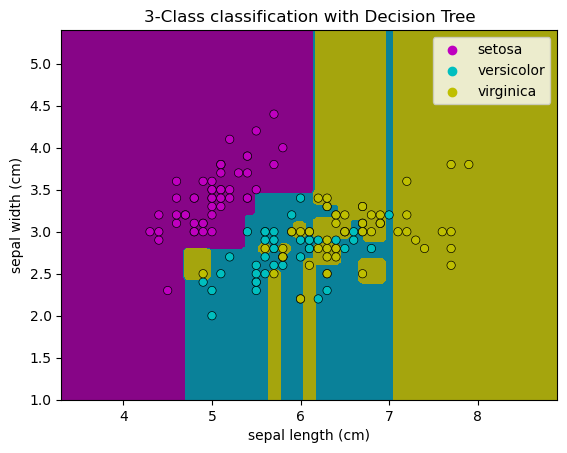

In [80]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587", "#0a8199","#a5a50d"])
cmap_scatter = ["m", "c","y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary,
    response_method="predict",
    xlabel=features[0],
    ylabel=features[1],
)

# Plot training points with seaborn

cmap_blend = ["m", "c", "y"] #define color palette for scatterplot

sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("3-Class classification with Decision Tree")